EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering

Name: Saumyajith S.A.D.P.                         Index: 210580M



1

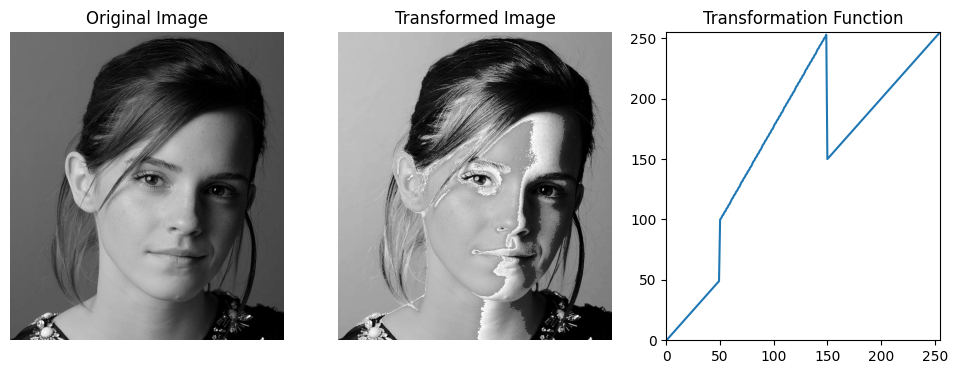

In [96]:
# Import necessary libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
f = cv.imread('C:/Users/spram/Documents/IPNMV/images/emma.jpg', cv.IMREAD_GRAYSCALE)

# Define the key points from the intensity transformation in the graph 
input_values = np.array([0, 50, 50, 150, 150, 255])
output_values = np.array([0, 50, 100, 255, 150, 255])

# Create a lookup table using linear interpolation
t = np.interp(np.arange(256), input_values, output_values).astype(np.uint8)

# Apply the transformation to the image
g = t[f]

# Plot the original and transformed images
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# Original image
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')

# Transformed image
ax[1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed Image')

# Transformation function plot
ax[2].plot(np.arange(256), t)
ax[2].set_ylim([0, 255])
ax[2].set_xlim([0, 255])
ax[2].set_title('Transformation Function')

# Turn off axis for images
for a in ax[0:2]:
    a.axis('off')

plt.show()



2

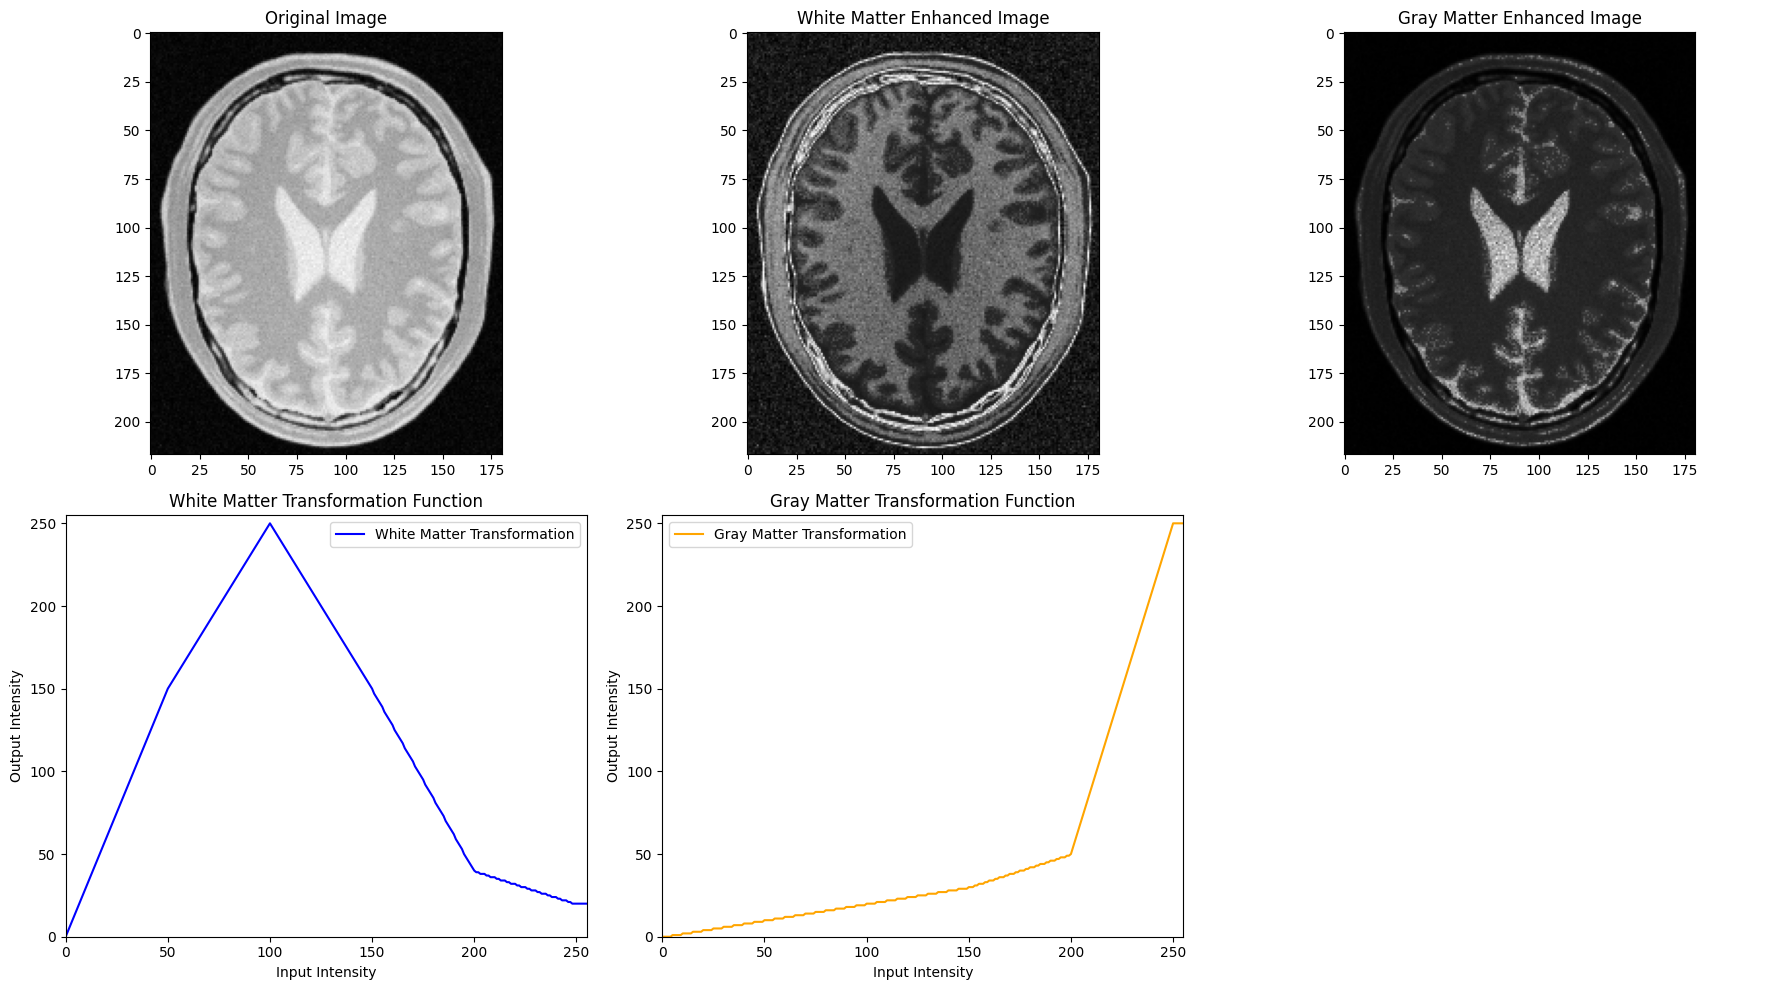

In [97]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the brain proton density image
image_path = 'C:\\Users\\spram\\Documents\\IPNMV\\images\\brain_proton_density_slice.png'  
f = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Define key points for the transformations
# White Matter Transformation
input_values_white = np.array([0, 50, 100, 150, 200,250])
output_values_white = np.array([0, 150, 250, 150, 40,20])

# Gray Matter Transformation
input_values_gray = np.array([0, 50, 100, 150, 200, 250])
output_values_gray = np.array([0, 10, 20, 30, 50, 250])

# Create lookup tables using linear interpolation for non-linear transformations
t_white = np.interp(np.arange(256), input_values_white, output_values_white).astype(np.uint8)
t_gray = np.interp(np.arange(256), input_values_gray, output_values_gray).astype(np.uint8)

# Apply transformations to the image
g_white_matter = t_white[f]
g_gray_matter = t_gray[f]

# Plot the results
fig, ax = plt.subplots(2, 3, figsize=(18, 10))

# Original image
ax[0, 0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Image')

# Transformed images
ax[0, 1].imshow(g_white_matter, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title('White Matter Enhanced Image')

ax[0, 2].imshow(g_gray_matter, cmap='gray', vmin=0, vmax=255)
ax[0, 2].set_title('Gray Matter Enhanced Image')

# Transformation function plots for white matter
ax[1, 0].plot(np.arange(256), t_white, label='White Matter Transformation', color='blue')
ax[1, 0].set_title('White Matter Transformation Function')
ax[1, 0].set_xlabel('Input Intensity')
ax[1, 0].set_ylabel('Output Intensity')
ax[1, 0].set_ylim([0, 255])
ax[1, 0].set_xlim([0, 255])
ax[1, 0].legend()

# Transformation function plots for gray matter
ax[1, 1].plot(np.arange(256), t_gray, label='Gray Matter Transformation', color='orange')
ax[1, 1].set_title('Gray Matter Transformation Function')
ax[1, 1].set_xlabel('Input Intensity')
ax[1, 1].set_ylabel('Output Intensity')
ax[1, 1].set_ylim([0, 255])
ax[1, 1].set_xlim([0, 255])
ax[1, 1].legend()

# Hide the axes for the last plot
ax[1, 2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()




3

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\spram\AppData\Local\Temp\ipykernel_15180\1648988696.py:6: SyntaxWarning: invalid escape sequence '\s'
  image_path = 'C:\\Users\spram\Documents\IPNMV\images\highlights_and_shadows.jpg'


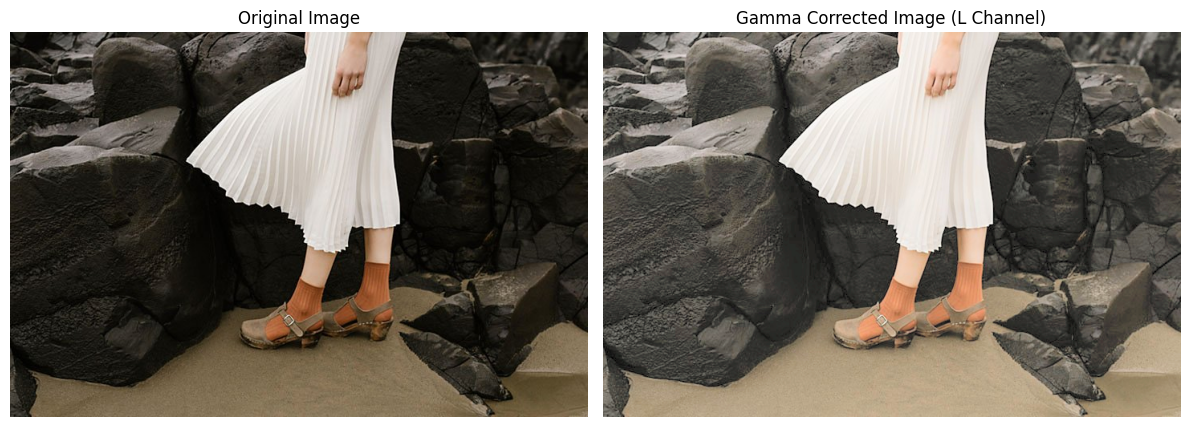

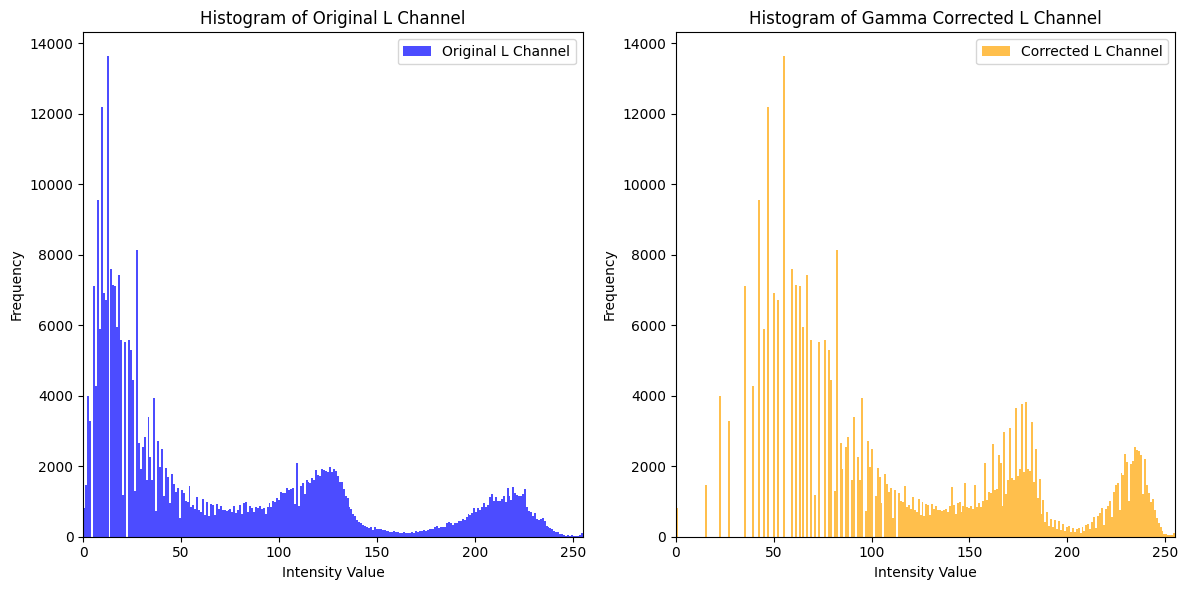

In [98]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'C:\\Users\spram\Documents\IPNMV\images\highlights_and_shadows.jpg' 
original_image = cv.imread(image_path)

# Convert the image from RGB to Lab color space
lab_image = cv.cvtColor(original_image, cv.COLOR_BGR2Lab)

# Split the Lab image into its channels
L_channel, a_channel, b_channel = cv.split(lab_image)

# Set the gamma value for correction
gamma = 0.5  # Gamma

# Apply gamma correction to the L channel
L_corrected = np.clip((L_channel / 255.0) ** gamma * 255, 0, 255).astype(np.uint8)

# Merge the modified L channel back with the original a and b channels
corrected_lab_image = cv.merge((L_corrected, a_channel, b_channel))

# Convert the corrected Lab image back to RGB color space
corrected_image = cv.cvtColor(corrected_lab_image, cv.COLOR_Lab2BGR)

# Plot the original and corrected images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Display original image
ax[0].imshow(cv.cvtColor(original_image, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')

# Display corrected image
ax[1].imshow(cv.cvtColor(corrected_image, cv.COLOR_BGR2RGB))
ax[1].set_title('Gamma Corrected Image (L Channel)')

# Turn off axes for better visualization
for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

# Plot histograms of the original and corrected L channels
plt.figure(figsize=(12, 6))

# Histogram for the original L channel
plt.subplot(1, 2, 1)
plt.hist(L_channel.ravel(), bins=256, color='blue', alpha=0.7, label='Original L Channel')
plt.title('Histogram of Original L Channel')
plt.xlim([0, 255])
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.legend()

# Histogram for the corrected L channel
plt.subplot(1, 2, 2)
plt.hist(L_corrected.ravel(), bins=256, color='orange', alpha=0.7, label='Corrected L Channel')
plt.title('Histogram of Gamma Corrected L Channel')
plt.xlim([0, 255])
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


4

<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
C:\Users\spram\AppData\Local\Temp\ipykernel_15180\497907860.py:6: SyntaxWarning: invalid escape sequence '\s'
  image_path = 'C:\\Users\spram\Documents\IPNMV\images\spider.png'
C:\Users\spram\AppData\Local\Temp\ipykernel_15180\497907860.py:31: RuntimeWarning: overflow encountered in scalar subtract
  transformed[i, j] = min(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)
C:\Users\spram\AppData\Local\Temp\ipykernel_15180\497907860.py:31: RuntimeWarning: overflow encountered in scalar negative
  transformed[i, j] = min(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)


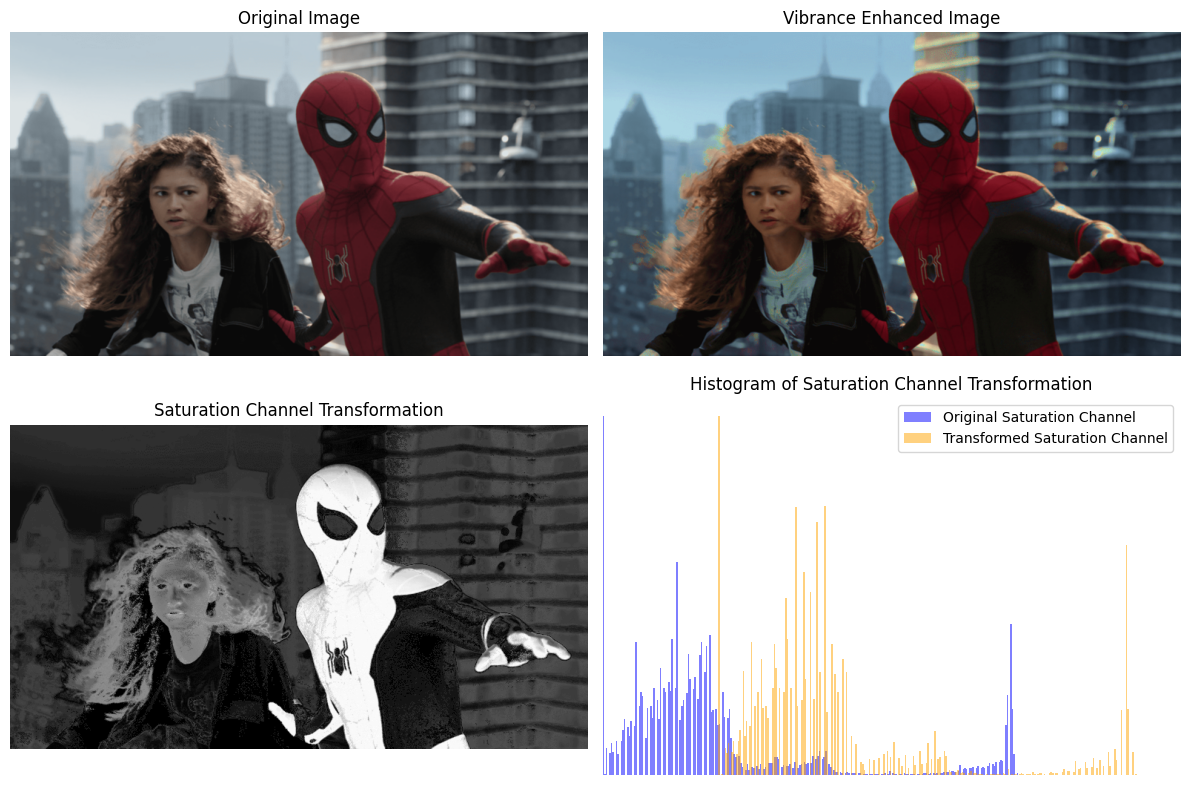

In [99]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'C:\\Users\spram\Documents\IPNMV\images\spider.png'
im = cv.imread(image_path)

# Convert the image from BGR to HSV color space
im_hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)

# Split the image into hue, saturation, and value channels
h_channel = im_hsv[:, :, 0]
s_channel = im_hsv[:, :, 1]
v_channel = im_hsv[:, :, 2]

# Define parameters for the intensity transformation
a = 0.4  # [0,1]
sigma = 70

# Create a function to apply the intensity transformation
def intensity_transformation(s_channel, a, sigma):
    # Prepare the transformed channel
    transformed = np.zeros_like(s_channel, dtype=np.uint8)

    # Apply the transformation to each pixel in the saturation channel
    for i in range(s_channel.shape[0]):
        for j in range(s_channel.shape[1]):
            x = s_channel[i, j]  # Get the intensity value (input)
            # Apply the given intensity transformation function
            transformed[i, j] = min(x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255)

    # Clip values to ensure they are within the valid range
    transformed = np.clip(transformed, 0, 255).astype(np.uint8)
    return transformed

# Apply the intensity transformation to the saturation channel
s_channel_transformed = intensity_transformation(s_channel, a, sigma)

# Recombine the channels
im_hsv_transformed = cv.merge((h_channel, s_channel_transformed, v_channel))

# Convert back to BGR color space for visualization
vibrance_enhanced_image = cv.cvtColor(im_hsv_transformed, cv.COLOR_HSV2BGR)

# Plotting the original image, vibrance-enhanced image, and the intensity transformation
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Original Image
ax[0, 0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0, 0].set_title('Original Image')

# Vibrance Enhanced Image
ax[0, 1].imshow(cv.cvtColor(vibrance_enhanced_image, cv.COLOR_BGR2RGB))
ax[0, 1].set_title('Vibrance Enhanced Image')

# Intensity Transformation of the Saturation Channel
ax[1, 0].imshow(s_channel_transformed, cmap='gray')
ax[1, 0].set_title('Saturation Channel Transformation')

# Histogram of Saturation Channel Transformation
ax[1, 1].hist(s_channel.ravel(), bins=256, color='blue', alpha=0.5, label='Original Saturation Channel', density=True)
ax[1, 1].hist(s_channel_transformed.ravel(), bins=256, color='orange', alpha=0.5, label='Transformed Saturation Channel', density=True)
ax[1, 1].set_title('Histogram of Saturation Channel Transformation')
ax[1, 1].set_xlim([0, 255])
ax[1, 1].legend()

# Turn off axes for better visualization
for a in ax.ravel():
    a.axis('off')

plt.tight_layout()
plt.show()


Value of a used for vibrance enhancement: 0.4

5

<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\s'
C:\Users\spram\AppData\Local\Temp\ipykernel_15180\3545748372.py:24: SyntaxWarning: invalid escape sequence '\s'
  image_path = 'C:\\Users\spram\Documents\IPNMV\images\shells.tif'


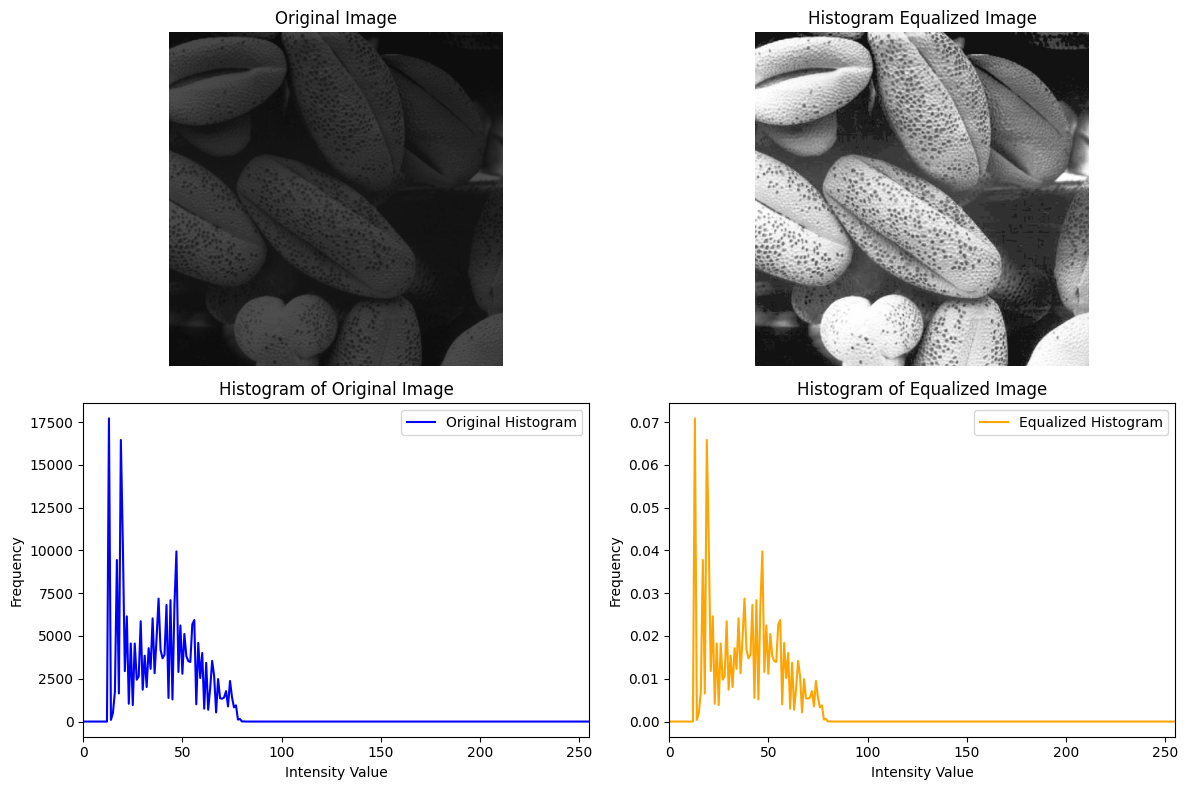

In [100]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Calculate histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    
    # Calculate cumulative distribution function (CDF)
    cdf = hist.cumsum()
    
    # Normalize the CDF
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
    
    # Create the transformation function based on the CDF
    t = np.array([cdf_normalized[i] for i in range(256)], dtype=np.uint8)
    
    # Apply the transformation to the image
    equalized_image = t[image]
    
    return equalized_image, hist, hist / hist.sum(), cdf_normalized

# Load the grayscale image
image_path = 'C:\\Users\spram\Documents\IPNMV\images\shells.tif'
f = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Perform histogram equalization
g, original_hist, equalized_hist, cdf_normalized = histogram_equalization(f)

# Plot the original and equalized images, and their histograms
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Original Image
ax[0, 0].imshow(f, cmap='gray', vmin=0, vmax=255)
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

# Equalized Image
ax[0, 1].imshow(g, cmap='gray', vmin=0, vmax=255)
ax[0, 1].set_title('Histogram Equalized Image')
ax[0, 1].axis('off')

# Histogram of Original Image
ax[1, 0].plot(original_hist, color='blue', label='Original Histogram')
ax[1, 0].set_title('Histogram of Original Image')
ax[1, 0].set_xlim([0, 255])
ax[1, 0].set_xlabel('Intensity Value')
ax[1, 0].set_ylabel('Frequency')
ax[1, 0].legend()

# Histogram of Equalized Image
ax[1, 1].plot(equalized_hist, color='orange', label='Equalized Histogram')
ax[1, 1].set_title('Histogram of Equalized Image')
ax[1, 1].set_xlim([0, 255])
ax[1, 1].set_xlabel('Intensity Value')
ax[1, 1].set_ylabel('Frequency')
ax[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()
